Tasks:
Using the pre-processed data from the file demographics.txt or demographics.xls obtained
from the previous tasks:
1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.
2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.
3. Plot the results of the regression.
4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.

In [48]:
# Prepare the regression model

from sklearn.linear_model import LogisticRegression
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


df_x = pd.read_csv('../task_one/imputed_data_knn.csv', sep=',')

# Mix the dataset
df_x = df_x.sample(frac=1)
df_y = df_x["Group"]

# Removing non independent variables and non-relevant ones; ID and Study are not relevant for the results as they are just defined for recognizing the results
df_x = df_x.drop(columns=["Group", "ID", "Study"])

#Data split into train and test:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.40)

# Increase iterations because default 100 does not converge
regression = LogisticRegression(max_iter=3000)

regression.fit(df_x_train, df_y_train)

#Evaluate the model:
print("Score on training data: %f" % regression.score(df_x_train, df_y_train))
print("Score on test data: %f" % regression.score(df_x_test, df_y_test))

Score on training data: 0.888889
Score on test data: 0.865672


In [49]:
# different approach, ordering
# # Prepare the regression model

# from sklearn.linear_model import LogisticRegression
# import pandas as pd
# from pprint import pprint
# import matplotlib.pyplot as plt
# import numpy as np


# df_x = pd.read_csv('../task_one/imputed_data_knn.csv', sep=',')
# df_x = df_x.sample(frac=1)

# split = int(len(df_x.index) * 0.8)
# df_x_train = df_x.iloc[:split,:]
# df_x_train = df_x_train.sort_values("Group")

# df_x_test = df_x.iloc[split:,:]
# df_x_test = df_x_test.sort_values("Group")

# df_y_train = df_x_train["Group"]
# df_y_test = df_x_test["Group"]


# # Removing non independent variables and non-relevant ones; ID and Study are not relevant for the results as they are just defined for recognizing the results
# df_x_train = df_x_train.drop(columns=["Group", "ID", "Study"])
# df_x_test = df_x_test.drop(columns=["Group", "ID", "Study"])


# # Increase iterations because default 100 does not converge
# regression = LogisticRegression(max_iter=3000)

# regression.fit(df_x_train, df_y_train)

In [50]:
# 1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.

# Calculate the predicted probabilities; Documentation:
# Probability estimates.
# The returned estimates for all classes are ordered by the label of classes.
predicted_probabilities = regression.predict_proba(df_x_train)

# Get index for the PD group (1)
index_pd = regression.classes_.tolist().index(1)

# Get index for the CO group (2)
index_co = regression.classes_.tolist().index(2)

# Access the probabilities for each group
probability_pd = predicted_probabilities[:, index_pd]
probability_co = predicted_probabilities[:, index_co]

# calculate the mean probabilities for each group
print("Probability of PD:")
print(probability_pd.mean())

print("\nProbability of CO:")
print(probability_co.mean())

Probability of PD:
0.5757634652549187

Probability of CO:
0.4242365347450813


In [51]:
# 2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.

# documentation: Coefficient of the features in the decision function.
beta_coefficients = regression.coef_

columns = df_x_train.columns

print("Beta Coefficients:")
for i, coef in enumerate(beta_coefficients[0]):
    print('{:>12}  {:>10}  {:>15}'.format(columns[i], f"β{i+1} =", coef))
    #pprint(f"{columns[i]}    β{i+1}: {coef}")

Beta Coefficients:
     Subjnum        β1 =  -0.013056748640920062
      Gender        β2 =  -0.29267964632796195
         Age        β3 =  -0.05692942610422469
      Height        β4 =  -0.0854659165423067
      Weight        β5 =  0.041489654841536126
   HoehnYahr        β6 =  -1.1895646376460889
       UPDRS        β7 =  -0.12112980210157759
      UPDRSM        β8 =  -0.00620082959197079
        TUAG        β9 =  -0.25487887775988083
    Speed_01       β10 =  0.46713329864766834
    Speed_02       β11 =  -0.03694525210777272
    Speed_03       β12 =  0.4235155418842887
    Speed_04       β13 =  0.34334283109547
    Speed_05       β14 =  0.3623253906764118
    Speed_06       β15 =  0.3479013432402144
    Speed_07       β16 =  0.31405638629478116
    Speed_10       β17 =  1.0656065891972546


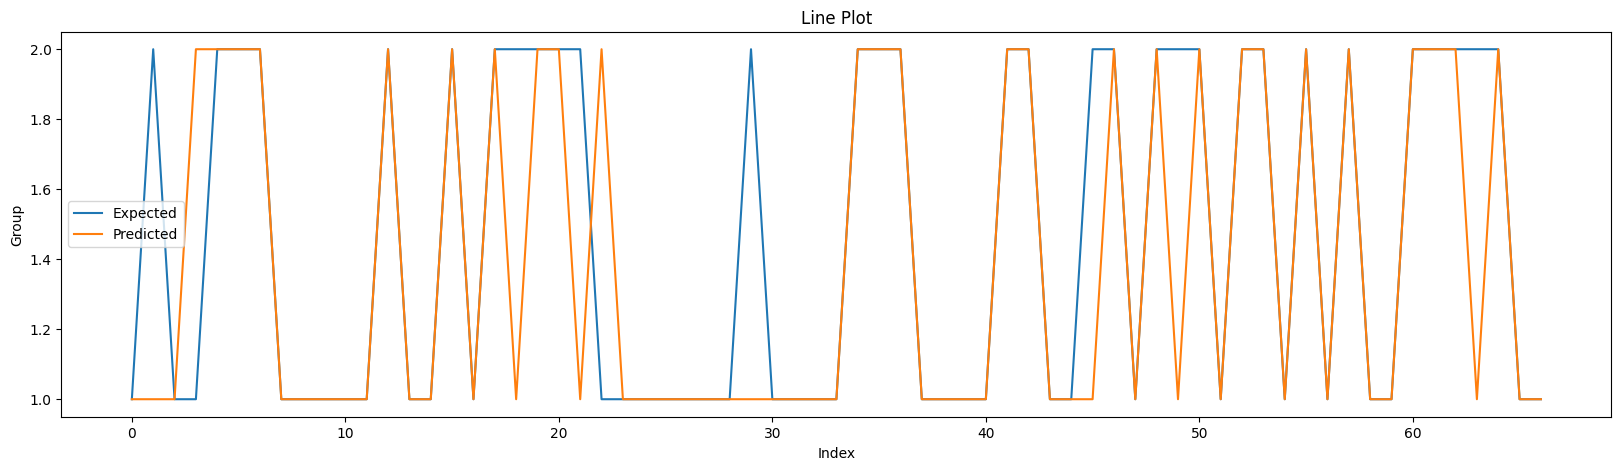

In [52]:
# 3. Plot the results of the regression.

columns = df_x_train.columns
num_cols = len(columns)
y_pred = regression.predict(df_x_test)

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 5))
x = list(range(len(df_y_pred)))
# Plot the lines
ax.plot(x, df_y_test, label='Expected')
ax.plot(x, y_pred, label='Predicted')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Group')
ax.set_title('Line Plot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [53]:
# 4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math 

test = df_y_test.to_list()
mae = 0
length = len(y_pred)

#mean absolute error
for i in range(length):
    res = abs(test[i] - y_pred[i])
    mae = mae + res

mae_final = mae / length
print(f"the mean absolute error using sklearn {mae_final}")

rmse = 0
for i in range(length):
    res = math.pow(test[i] - y_pred[i], 2)
    rmse = rmse + res

rmse_final = math.sqrt(rmse / length)
print(f"the root mean squared error using sklearn {rmse_final}")
df = pd.DataFrame()
print(f"the mean absolute error using sklearn {mean_absolute_error(df_y_test, y_pred)}")
print(f"the root mean squared error using sklearn {np.sqrt(mean_squared_error(df_y_test, y_pred))}")

the mean absolute error using sklearn 0.13432835820895522
the root mean squared error using sklearn 0.36650833306891567
the mean absolute error using sklearn 0.13432835820895522
the root mean squared error using sklearn 0.36650833306891567
